<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/model_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularização

No aprendizado de máquina supervisionado, a regularização se refere a um conjunto de técnicas para prevenir **OVERFITTING**.

Essas técnicas modificam a função de custo para penalizar **alta complexidade** do modelo, tentar encontrar um modelo mais simples que **generalize** melhor.

## L1 (LASSO - Least Absolute Shrinkage and Selection Operator)

Modelo linear que estima vetores de coeficientes **esparsos**. Ou seja, possui uma tendência em preferir soluções com **menos coeficientes diferentes de zero**, diminuindo a **quantidade** de atributos dos quais o modelo depende.

A função de custo é alterada de tal forma:

$$
L1(θ) = J(θ) + λ∑|θⱼ|
$$

Exemplo, aplicada a regressão:

$$
J(θ) = \frac{1}{2m}∑(ŷᵢ-yᵢ)^2 + λ∑|θⱼ|
$$

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X,y) # regressão linear

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l1", C=0.1)
clf.fit(X, y==0) # classificação (logistica)

Features irrelevantes costumam receber impacto 0 na função de custo, uma espécie de "Feature Selection".

Inclusive o modelo pode ser usado diretamente para isso. (Redução de Dimensionalidade)

In [ ]:
from sklearn.feature_selection import SelectFromModel

lassoreg = Lasso(alpha=0.01).fit(X,y)
model = SelectFromModel(lassoreg, prefit=True)
X_new = model.transform(X)

## L2 (Ridge - "colina")

Essa regularização possui um hiperparâmetro `alfa` - "termo de regularização".

Controla o quanto penalizamos cada coeficiente. Valores altos de `alfa` geram modelos mais simples. E esse `alfa` deve ser ajustado como qualquer outro hiperparâmetro, por meio de **model selection**.

A função de custo se altera de tal forma:

$$
L2 = J(θ) + λ∑(θⱼ)²
$$

Exemplo, aplicada a regressão:

$$
J(θ) = \frac{1}{2m}∑(ŷᵢ-yᵢ)^2 + \alpha∑(θⱼ)^2
$$

A ideia aqui, diferente da L1, não é **zerar** os coeficientes, e sim dar uma certa ordem de importância para cada um.

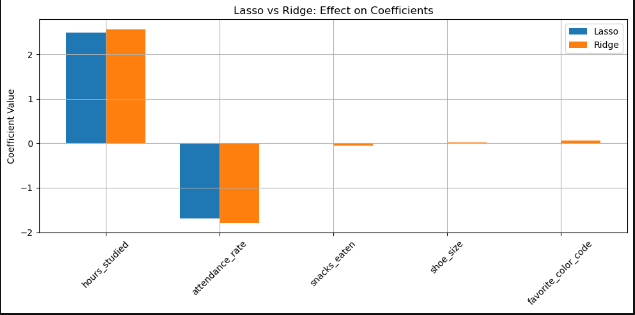

Teste com uma regressão POLINOMIAL de grau 15

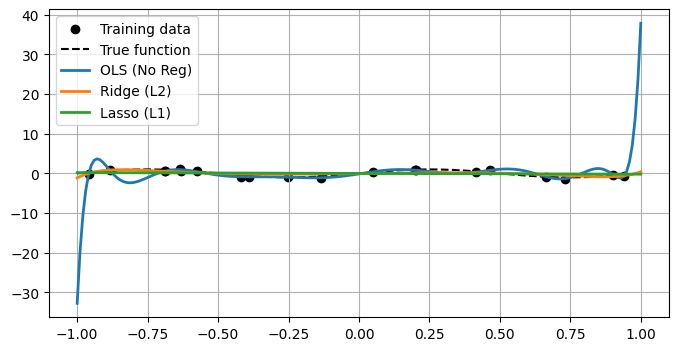

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# gerando uma função seno com noise
X = np.sort(np.random.rand(20, 1) * 2 - 1, axis=0)  # range [-1, 1]
y = np.sin(2 * np.pi * X[:, 0]) + 0.3 * np.random.randn(20)

# modelos
degree = 15

ols = make_pipeline(PolynomialFeatures(degree), LinearRegression())
ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))
lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))

# treino
ols.fit(X,y)
ridge.fit(X,y)
lasso.fit(X,y)

# teste
x_test = np.linspace(-1,1,200).reshape(-1,1)

ols_pred = ols.predict(x_test)
ridge_pred = ridge.predict(x_test)
lasso_pred = lasso.predict(x_test)

# Plot
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='black', label='Training data')
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'k--', label='True function')
plt.plot(x_test, ols_pred, label='OLS (No Reg)', linewidth=2)
plt.plot(x_test, ridge_pred, label='Ridge (L2)', linewidth=2)
plt.plot(x_test, lasso_pred, label='Lasso (L1)', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

## Elastic Net

Um modelo de Regressão Linear regularizado por meio da combinação de Ridge e Lasso.

Matemáticamente:
$$
J(θ) = \frac{1}{2m}||XΘ-y||^2_2 + \alphaρ||Θ||_1 + \frac{α(1-ρ)}{2}||Θ||^2_2
$$

ρ controla a combinação convexa.

Útil quando existem vários atributos correlacionados entre si. O Lasso provavelmente escolha um deles aleatoriamente, a rede escolhe ambos.

ρ no scikitlearn é representado por `l1_ratio`

In [ ]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0) # l1_ratio default é 0.5
regr.fit(X,y)

# Resumo

- L1 (Lasso) -> Valor Absoluto, promove esparsidade (alguns viram 0) -> Feature Selection

- L2 (Ridge) -> Quadrado, diminui os pesos mas não zera -> Todas Features úteis

- Elastic Net -> Combinação, balanço dos dois -> Features Correlacionadas